In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/test_loan.csv')

In [10]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [4]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [6]:
data.shape

(367, 12)

In [7]:
data.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [8]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [9]:
data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [11]:
data['Dependents'].mode(0)

0    0
Name: Dependents, dtype: object

In [13]:
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])

In [14]:
data['Gender'].mode(0)

0    Male
Name: Gender, dtype: object

In [15]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])

In [16]:
data['Self_Employed'].mode(0)

0    No
Name: Self_Employed, dtype: object

In [17]:
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [18]:
data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

<Axes: ylabel='LoanAmount'>

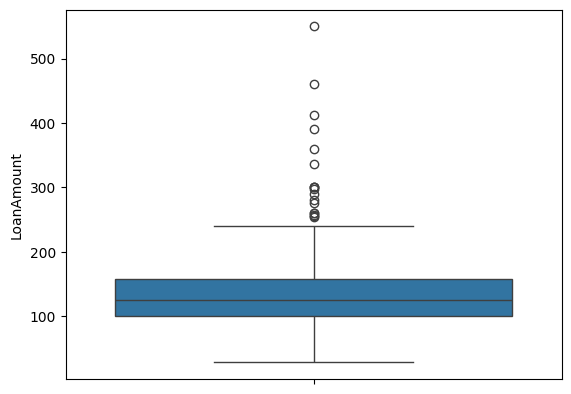

In [19]:
sns.boxplot( data['LoanAmount'])

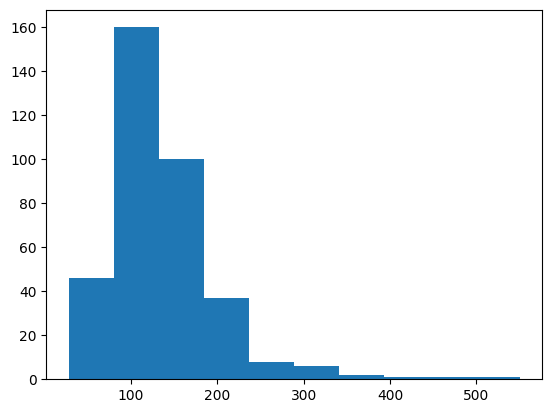

In [20]:
plt.hist(data['LoanAmount'])
plt.show()

In [21]:
q1 = data['LoanAmount'].quantile(0.25)
q3 = data['LoanAmount'].quantile(0.75)
iqr = q3 -q1
print(iqr)

57.75


In [22]:
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr

In [23]:
print(upper_limit,lower_limit)

244.625 13.625


In [24]:
def limit_imputer(value):
    if value>upper_limit:
        return upper_limit
    if value<lower_limit:
        return lower_limit
    else:
        return value

In [25]:
data['LoanAmount'] = data['LoanAmount'].apply(limit_imputer)

<Axes: ylabel='LoanAmount'>

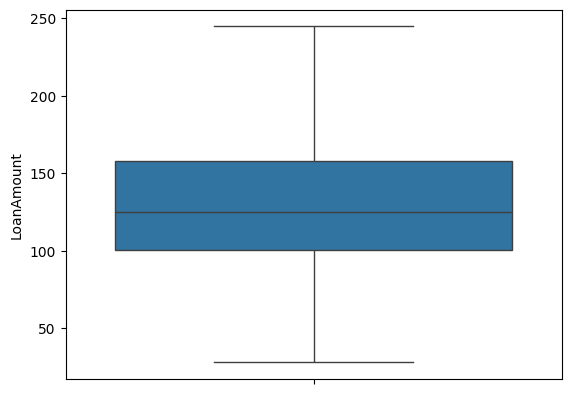

In [26]:
sns.boxplot( data['LoanAmount'])

In [27]:
data.dropna(inplace = True, axis = 0, subset=['LoanAmount'])

In [28]:
data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [29]:
data['Dependents'] = data['Dependents'].str.strip('+')

In [30]:
data.head(15)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.000,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.000,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.000,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.000,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.000,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.000,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.000,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.000,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,No,13633,0,244.625,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.000,360.0,1.0,Semiurban


In [31]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [32]:
data['Dependents'] = data['Dependents'].astype('int32')

In [33]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents             int32
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [34]:
num_columns = ['Loan_Amount_Term','Credit_History'
               ]

In [35]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
data[num_columns]=imputer.fit_transform(data[num_columns])

In [36]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [37]:
data.shape

(362, 12)

In [38]:
data.corr()

<ipython-input-38-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Dependents,1.000000,0.143735,-0.055649,0.129947,-0.048628,-0.055650
ApplicantIncome,0.143735,1.000000,-0.108717,0.382220,0.024271,0.089249
CoapplicantIncome,-0.055649,-0.108717,1.000000,0.148083,-0.005350,-0.063938
LoanAmount,0.129947,0.382220,0.148083,1.000000,0.107229,-0.044855
Loan_Amount_Term,-0.048628,0.024271,-0.005350,0.107229,1.000000,-0.036760
Credit_History,-0.055650,0.089249,-0.063938,-0.044855,-0.036760,1.000000


In [39]:
data['Credit_History'].unique()

array([1., 0.])

In [40]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [41]:
x = data.drop('LoanAmount', axis = 1)

In [42]:
y = data['LoanAmount']

In [43]:
x = pd.get_dummies(x) # one hot encoding

In [44]:
x.head()

,Dependents,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Loan_ID_LP001015,Loan_ID_LP001022,Loan_ID_LP001031,Loan_ID_LP001035,Loan_ID_LP001051,...,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,5720,0,360.0,1.0,1,0,0,0,0,...,1,0,1,1,0,1,0,0,0,1
1,1,3076,1500,360.0,1.0,0,1,0,0,0,...,1,0,1,1,0,1,0,0,0,1
2,2,5000,1800,360.0,1.0,0,0,1,0,0,...,1,0,1,1,0,1,0,0,0,1
3,2,2340,2546,360.0,1.0,0,0,0,1,0,...,1,0,1,1,0,1,0,0,0,1
4,0,3276,0,360.0,1.0,0,0,0,0,1,...,1,1,0,0,1,1,0,0,0,1


In [45]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()

In [46]:
x.loc[:,['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term']] = min_max.fit_transform(x[['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term']])

In [50]:
x.head(15)

,Dependents,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Loan_ID_LP001015,Loan_ID_LP001022,Loan_ID_LP001031,Loan_ID_LP001035,Loan_ID_LP001051,...,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,0.078865,0.000000,0.746835,1.0,1,0,0,0,0,...,1,0,1,1,0,1,0,0,0,1
1,1,0.042411,0.062500,0.746835,1.0,0,1,0,0,0,...,1,0,1,1,0,1,0,0,0,1
2,2,0.068938,0.075000,0.746835,1.0,0,0,1,0,0,...,1,0,1,1,0,1,0,0,0,1
3,2,0.032263,0.106083,0.746835,1.0,0,0,0,1,0,...,1,0,1,1,0,1,0,0,0,1
4,0,0.045168,0.000000,0.746835,1.0,0,0,0,0,1,...,1,1,0,0,1,1,0,0,0,1
5,0,0.029850,0.142583,0.746835,1.0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,0,1
6,1,0.030691,0.000000,0.746835,1.0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,1,0
7,2,0.053510,0.000000,0.746835,0.0,0,0,0,0,0,...,1,0,1,0,1,1,0,1,0,0
8,2,0.187966,0.000000,0.493671,1.0,0,0,0,0,0,...,1,0,1,1,0,1,0,0,0,1
9,0,0.033090,0.100000,0.746835,1.0,0,0,0,0,0,...,1,1,0,0,1,1,0,0,1,0
